# SDG 7: Electricity Access in Sub-Saharan Africa
## Exploratory Data Analysis (EDA) Report

---

**Author:** [Your Name]  
**Date:** November 2025  
**Course:** Data Science Capstone  

---

## Table of Contents
1. [Introduction & Problem Definition](#1-introduction)
2. [Data Collection Plan](#2-data-collection)
3. [Data Loading & Initial Exploration](#3-data-loading)
4. [Data Cleaning & Preprocessing](#4-data-cleaning)
5. [Exploratory Data Analysis](#5-eda)
6. [Key Findings & Insights](#6-findings)
7. [Hypotheses for ML Phase](#7-hypotheses)
8. [Conclusion](#8-conclusion)

---
# 1. Introduction & Problem Definition <a id='1-introduction'></a>

## 1.1 SDG 7 Context

**Sustainable Development Goal 7: Affordable and Clean Energy**

SDG 7 aims to "ensure access to affordable, reliable, sustainable and modern energy for all" by 2030. Access to electricity is fundamental to human development, enabling:
- Healthcare services (refrigeration for vaccines, medical equipment)
- Education (lighting for study, digital learning)
- Economic opportunities (businesses, agriculture)
- Improved quality of life (communication, safety)

Sub-Saharan Africa (SSA) faces the greatest electricity access challenges globally, with approximately 600 million people lacking access to electricity.

## 1.2 Research Question

> **How has electricity access evolved across Sub-Saharan African countries from 1990 to 2023, and what patterns, trends, and disparities can be identified to inform future policy and infrastructure development?**

### Sub-questions:
1. What is the current state of electricity access across SSA countries?
2. Which countries have made the most/least progress since 1990?
3. Are there regional or income-group patterns in electricity access?
4. What anomalies or data quality issues exist in the dataset?

## 1.3 Scope

- **Geographic Focus:** 50 Sub-Saharan African countries
- **Time Period:** 1990-2023 (34 years)
- **Primary Indicator:** Access to electricity (% of population)
- **Future Extension:** Correlations with education, health, water, and air quality indicators

---
# 2. Data Collection Plan <a id='2-data-collection'></a>

## 2.1 Data Source Documentation

| Attribute | Details |
|-----------|----------|
| **Source** | World Bank - World Development Indicators (WDI) |
| **Indicator Code** | EG.ELC.ACCS.ZS |
| **Indicator Name** | Access to electricity (% of population) |
| **Collection Method** | World Bank API (CSV download) |
| **Original Coverage** | 266 countries/regions, 1960-2024 |
| **Last Updated** | 2025-10-07 |
| **License** | CC BY-4.0 |
| **URL** | https://data.worldbank.org/indicator/EG.ELC.ACCS.ZS |

## 2.2 Indicator Definition

> "Access to electricity is the percentage of population with access to electricity. Electrification data are collected from industry, national surveys and international sources."

**Original Data Source:** SDG 7.1.1 Electrification Dataset, World Bank (WB)  
**Methodology:** Population-weighted average from nationally representative household surveys and census data

## 2.3 Data Files

| File | Description | Size |
|------|-------------|------|
| `API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_254301.csv` | Main data file | ~122 KB |
| `Metadata_Country_*.csv` | Country metadata (region, income group) | ~60 KB |
| `Metadata_Indicator_*.csv` | Indicator description | ~600 B |

## 2.4 Reliability Assessment

**Strengths:**
- Official SDG 7.1.1 tracking data used by UN and governments
- Standardized methodology across countries
- Regular updates and quality control by World Bank

**Limitations:**
- Survey-based data may have sampling errors
- Different survey years across countries
- Some countries have sparse data points
- Definition of "access" may vary (grid vs off-grid)

---
# 3. Data Loading & Initial Exploration <a id='3-data-loading'></a>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

# Custom color palette for SSA analysis
SSA_COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

print("Libraries loaded successfully!")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d')}")

Libraries loaded successfully!
Analysis Date: 2025-11-26


In [2]:
# Define SSA countries of interest (50 countries)
ssa_countries = [
    "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cameroon", "Central African Republic",
    "Chad", "Comoros", "Congo", "Côte d'Ivoire",
    "Democratic Republic of the Congo", "Djibouti",
    "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia",
    "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau",
    "Kenya", "Lesotho", "Liberia", "Madagascar", "Malawi",
    "Mali", "Mauritania", "Mauritius", "Mayotte", "Mozambique",
    "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
    "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa",
    "South Sudan", "Sudan", "Togo", "United Republic of Tanzania",
    "Uganda", "Zambia", "Zimbabwe"
]

print(f"Target SSA countries: {len(ssa_countries)}")

Target SSA countries: 50


In [3]:
# Define file paths
DATA_DIR = '../csv/'

# Load main data file (skip first 4 rows which contain metadata)
df_raw = pd.read_csv(
    DATA_DIR + 'API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_254301.csv',
    skiprows=4,
    encoding='utf-8'
)

print("Main data file loaded!")
print(f"Shape: {df_raw.shape}")

Main data file loaded!
Shape: (266, 70)


In [4]:
# Initial exploration of raw data
print("=" * 60)
print("INITIAL DATA EXPLORATION")
print("=" * 60)

print("\n--- First 5 rows ---")
display(df_raw.head())

print("\n--- Last 5 rows ---")
display(df_raw.tail())

print("\n--- Column names ---")
print(df_raw.columns.tolist())

INITIAL DATA EXPLORATION

--- First 5 rows ---


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,99.15,99.20,99.24,100.00,100.00,100.00,100.00,100.00,100.00,91.70,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,93.40,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,99.90,100.00,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.92,19.94,21.55,22.49,23.72,23.45,25.17,26.80,25.91,26.19,27.41,28.91,31.67,31.72,31.87,33.92,38.86,40.22,43.04,44.39,46.28,48.13,48.80,50.67,NaN,NaN
2,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.40,9.30,14.10,19.00,23.80,28.70,33.50,38.40,42.40,48.30,42.70,43.20,69.10,68.00,89.50,71.50,97.70,97.70,93.40,97.70,97.70,97.70,85.30,85.30,NaN,NaN
3,Africa Western and Central,AFW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.65,32.69,33.69,32.70,32.52,33.51,34.89,34.25,35.32,35.81,39.96,37.59,37.94,39.95,40.86,41.87,42.00,41.95,46.06,44.19,47.19,47.77,46.86,51.05,48.90,51.34,51.29,51.86,54.37,55.69,57.07,NaN,NaN
4,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.20,20.00,26.30,27.40,28.40,29.40,30.50,37.50,38.50,33.80,35.00,34.60,37.30,38.40,32.00,42.00,41.80,42.90,45.30,45.60,47.00,48.20,48.50,51.10,NaN,NaN



--- Last 5 rows ---


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
261,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.10,40.77,41.99,43.19,44.40,42.60,46.80,47.99,49.20,50.40,51.50,52.60,49.60,54.80,55.80,57.20,58.40,59.60,60.80,62.00,52.40,75.60,66.10,67.40,68.90,79.20,62.00,72.80,73.90,74.90,76.00,83.60,NaN,NaN
263,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.60,69.48,64.90,71.33,72.40,70.20,76.70,78.80,80.60,80.80,80.70,82.00,81.90,82.60,82.80,83.60,85.20,85.20,85.90,85.30,83.90,84.40,84.70,85.00,90.00,89.30,86.50,87.70,NaN,NaN
264,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.90,12.75,19.20,14.21,14.94,15.67,17.30,17.11,19.00,18.54,16.70,20.20,17.40,18.50,20.30,23.30,24.10,18.50,25.70,26.60,22.00,28.30,29.20,30.10,27.90,31.10,35.40,40.30,40.20,43.00,44.60,46.70,47.80,51.10,NaN,NaN
265,Zimbabwe,ZWE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.20,31.16,28.10,31.95,32.34,32.72,33.10,38.40,33.70,34.20,34.20,35.10,35.60,36.10,37.20,37.20,37.70,43.40,38.90,36.90,44.00,40.60,32.30,33.70,42.50,44.00,45.40,46.70,52.70,49.00,50.10,62.00,NaN,NaN



--- Column names ---
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Unnamed: 69']


In [5]:
# Data types and info
print("\n--- Data Types ---")
print(df_raw.dtypes)

print("\n--- Data Info ---")
df_raw.info()


--- Data Types ---
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969              float64
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              

In [6]:
# Load country metadata
df_meta_country = pd.read_csv(
    DATA_DIR + 'Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_254301.csv',
    encoding='utf-8'
)

print("Country metadata loaded!")
print(f"Shape: {df_meta_country.shape}")
display(df_meta_country.head(10))

Country metadata loaded!
Shape: (265, 6)


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
5,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
6,AND,Europe & Central Asia,High income,NaN,Andorra,NaN
7,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World,NaN
8,ARE,Middle East & North Africa,High income,NaN,United Arab Emirates,NaN
9,ARG,Latin America & Caribbean,Upper middle income,The World Bank systematically assesses the app...,Argentina,NaN


In [7]:
# Check unique regions and income groups in metadata
print("\n--- Unique Regions ---")
print(df_meta_country['Region'].dropna().unique())

print("\n--- Unique Income Groups ---")
print(df_meta_country['IncomeGroup'].dropna().unique())


--- Unique Regions ---
['Latin America & Caribbean' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Europe & Central Asia' 'East Asia & Pacific'
 'South Asia' 'North America']

--- Unique Income Groups ---
['High income' 'Low income' 'Lower middle income' 'Upper middle income']


## 3.1 Country Name Matching

World Bank uses different naming conventions than our SSA country list. We need to create a mapping.

In [8]:
# Check which SSA countries are in the raw data
wb_countries = df_raw['Country Name'].unique()

# Find direct matches
direct_matches = [c for c in ssa_countries if c in wb_countries]
no_matches = [c for c in ssa_countries if c not in wb_countries]

print(f"Direct matches: {len(direct_matches)}")
print(f"No direct match: {len(no_matches)}")
print("\nCountries without direct match:")
for c in no_matches:
    print(f"  - {c}")

Direct matches: 43
No direct match: 7

Countries without direct match:
  - Congo
  - Côte d'Ivoire
  - Democratic Republic of the Congo
  - Gambia
  - Mayotte
  - Somalia
  - United Republic of Tanzania


In [9]:
# Search for similar names in World Bank data
print("\nSearching for similar country names in World Bank data...\n")

for country in no_matches:
    # Get first word of country name for matching
    search_term = country.split()[0]
    matches = [c for c in wb_countries if search_term.lower() in c.lower()]
    print(f"{country}:")
    if matches:
        for m in matches:
            print(f"    -> {m}")
    else:
        print("    -> No match found")
    print()


Searching for similar country names in World Bank data...

Congo:
    -> Congo, Dem. Rep.
    -> Congo, Rep.

Côte d'Ivoire:
    -> No match found

Democratic Republic of the Congo:
    -> No match found

Gambia:
    -> Gambia, The

Mayotte:
    -> No match found

Somalia:
    -> Somalia, Fed. Rep.

United Republic of Tanzania:
    -> United Arab Emirates
    -> United Kingdom
    -> United States



In [10]:
# Create country name mapping (World Bank name -> Our SSA name)
wb_to_ssa_mapping = {
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Congo, Rep.": "Congo",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Gambia, The": "Gambia",
    "Tanzania": "United Republic of Tanzania",
    "Egypt, Arab Rep.": None,  # Not in SSA list
    "Eswatini": "Eswatini",  # Direct match (formerly Swaziland)
}

# Reverse mapping (SSA name -> World Bank name)
ssa_to_wb_mapping = {
    "Democratic Republic of the Congo": "Congo, Dem. Rep.",
    "Congo": "Congo, Rep.",
    "Côte d'Ivoire": "Cote d'Ivoire",
    "Gambia": "Gambia, The",
    "United Republic of Tanzania": "Tanzania",
}

print("Country name mappings created!")
print("\nSSA to World Bank mapping:")
for k, v in ssa_to_wb_mapping.items():
    print(f"  {k} -> {v}")

Country name mappings created!

SSA to World Bank mapping:
  Democratic Republic of the Congo -> Congo, Dem. Rep.
  Congo -> Congo, Rep.
  Côte d'Ivoire -> Cote d'Ivoire
  Gambia -> Gambia, The
  United Republic of Tanzania -> Tanzania


---
# 4. Data Cleaning & Preprocessing <a id='4-data-cleaning'></a>

## 4.1 Filter to SSA Countries

In [11]:
# Create list of World Bank country names for our SSA countries
wb_ssa_names = []

for country in ssa_countries:
    if country in ssa_to_wb_mapping:
        wb_ssa_names.append(ssa_to_wb_mapping[country])
    else:
        wb_ssa_names.append(country)

print(f"World Bank names for SSA countries: {len(wb_ssa_names)}")

World Bank names for SSA countries: 50


In [12]:
# Filter raw data to SSA countries
df_ssa = df_raw[df_raw['Country Name'].isin(wb_ssa_names)].copy()

print(f"Filtered to SSA countries: {df_ssa.shape[0]} rows")

# Check which countries were NOT found
found_countries = df_ssa['Country Name'].unique()
missing = [c for c in wb_ssa_names if c not in found_countries]

if missing:
    print(f"\nWARNING: {len(missing)} countries not found in World Bank data:")
    for m in missing:
        print(f"  - {m}")
else:
    print("\nAll SSA countries found!")

Filtered to SSA countries: 48 rows

  - Mayotte
  - Somalia


In [13]:
# Map World Bank names back to our SSA names for consistency
wb_to_ssa_full = {v: k for k, v in ssa_to_wb_mapping.items()}

df_ssa['Country Name Original'] = df_ssa['Country Name']  # Keep original
df_ssa['Country Name'] = df_ssa['Country Name'].replace(wb_to_ssa_full)

print("Country names standardized!")
print(f"\nUnique countries in filtered data: {df_ssa['Country Name'].nunique()}")

Country names standardized!

Unique countries in filtered data: 48


## 4.2 Filter to Time Period (1990-2023)

In [14]:
# Identify year columns
all_columns = df_ssa.columns.tolist()
year_columns = [col for col in all_columns if col.isdigit()]

print(f"Total year columns: {len(year_columns)}")
print(f"Year range in data: {min(year_columns)} - {max(year_columns)}")

# Filter to 1990-2023
target_years = [str(y) for y in range(1990, 2024)]
available_target_years = [y for y in target_years if y in year_columns]

print(f"\nTarget years (1990-2023): {len(target_years)}")
print(f"Available target years: {len(available_target_years)}")

Total year columns: 65
Year range in data: 1960 - 2024

Target years (1990-2023): 34
Available target years: 34


In [15]:
# Select relevant columns
id_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
df_ssa_filtered = df_ssa[id_columns + available_target_years].copy()

print(f"Filtered data shape: {df_ssa_filtered.shape}")
display(df_ssa_filtered.head())

Filtered data shape: (48, 38)


,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
4,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.20,20.00,26.30,27.40,28.40,29.40,30.50,37.50,38.50,33.80,35.00,34.60,37.30,38.40,32.00,42.00,41.80,42.90,45.30,45.60,47.00,48.20,48.50,51.10
16,Burundi,BDI,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.90,2.07,2.50,2.80,3.10,3.40,3.70,3.20,2.70,4.70,4.80,5.40,5.30,6.20,6.50,6.90,7.00,7.90,8.50,9.30,9.50,9.80,9.10,10.20,10.30,11.60
18,Benin,BEN,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,14.50,18.59,19.58,20.56,21.50,21.90,23.40,24.30,25.20,26.10,27.90,28.00,29.00,30.00,34.20,36.90,38.40,34.70,34.10,29.60,37.00,34.50,39.00,40.00,41.00,42.00,56.50,57.00
19,Burkina Faso,BFA,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,6.10,6.13,6.63,7.12,7.62,8.11,6.90,9.10,9.50,9.90,11.40,10.70,11.10,11.60,12.00,12.50,12.60,13.10,14.80,15.10,15.40,19.20,16.20,16.60,17.00,14.40,17.60,18.50,19.00,19.50,21.70
33,Botswana,BWA,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,10.10,9.40,11.64,13.88,16.13,18.36,20.60,22.83,25.05,26.50,24.80,27.00,33.10,35.30,37.50,39.70,41.90,44.50,43.40,52.00,53.20,56.00,58.00,60.00,62.10,64.20,67.40,68.30,70.10,71.80,73.70,75.90,76.00


## 4.3 Missing Value Analysis

In [16]:
# Analyze missing values per country
year_cols = available_target_years

missing_by_country = df_ssa_filtered.set_index('Country Name')[year_cols].isnull().sum(axis=1)
total_years = len(year_cols)

missing_pct_by_country = (missing_by_country / total_years * 100).round(1)
missing_df = pd.DataFrame({
    'Missing Years': missing_by_country,
    'Available Years': total_years - missing_by_country,
    'Missing %': missing_pct_by_country
}).sort_values('Missing %', ascending=False)

print("=" * 60)
print("MISSING DATA BY COUNTRY")
print("=" * 60)
display(missing_df)

MISSING DATA BY COUNTRY


,Missing Years,Available Years,Missing %
Country Name,,,
Liberia,17,17,50.00
South Sudan,17,17,50.00
Guinea-Bissau,12,22,35.30
Angola,10,24,29.40
Ethiopia,10,24,29.40
Sao Tome and Principe,10,24,29.40
Eswatini,10,24,29.40
Mauritania,10,24,29.40
Lesotho,10,24,29.40


In [17]:
# Summary statistics on missing data
print("\n--- Missing Data Summary ---")
print(f"Countries with complete data: {(missing_df['Missing %'] == 0).sum()}")
print(f"Countries with >50% missing: {(missing_df['Missing %'] > 50).sum()}")
print(f"Countries with 100% missing: {(missing_df['Missing %'] == 100).sum()}")
print(f"Average missing %: {missing_df['Missing %'].mean():.1f}%")


--- Missing Data Summary ---
Countries with complete data: 4
Countries with >50% missing: 0
Countries with 100% missing: 0
Average missing %: 17.8%


In [18]:
# Analyze missing values per year
missing_by_year = df_ssa_filtered[year_cols].isnull().sum()
total_countries = df_ssa_filtered.shape[0]
missing_pct_by_year = (missing_by_year / total_countries * 100).round(1)

year_missing_df = pd.DataFrame({
    'Year': year_cols,
    'Missing Countries': missing_by_year.values,
    'Missing %': missing_pct_by_year.values
})

print("\n--- Missing Data by Year (Selected Years) ---")
display(year_missing_df[year_missing_df['Year'].isin(['1990', '1995', '2000', '2005', '2010', '2015', '2020', '2023'])])


--- Missing Data by Year (Selected Years) ---


,Year,Missing Countries,Missing %
0,1990,44,91.70
5,1995,26,54.20
10,2000,3,6.20
15,2005,2,4.20
20,2010,0,0.00
25,2015,0,0.00
30,2020,0,0.00
33,2023,0,0.00


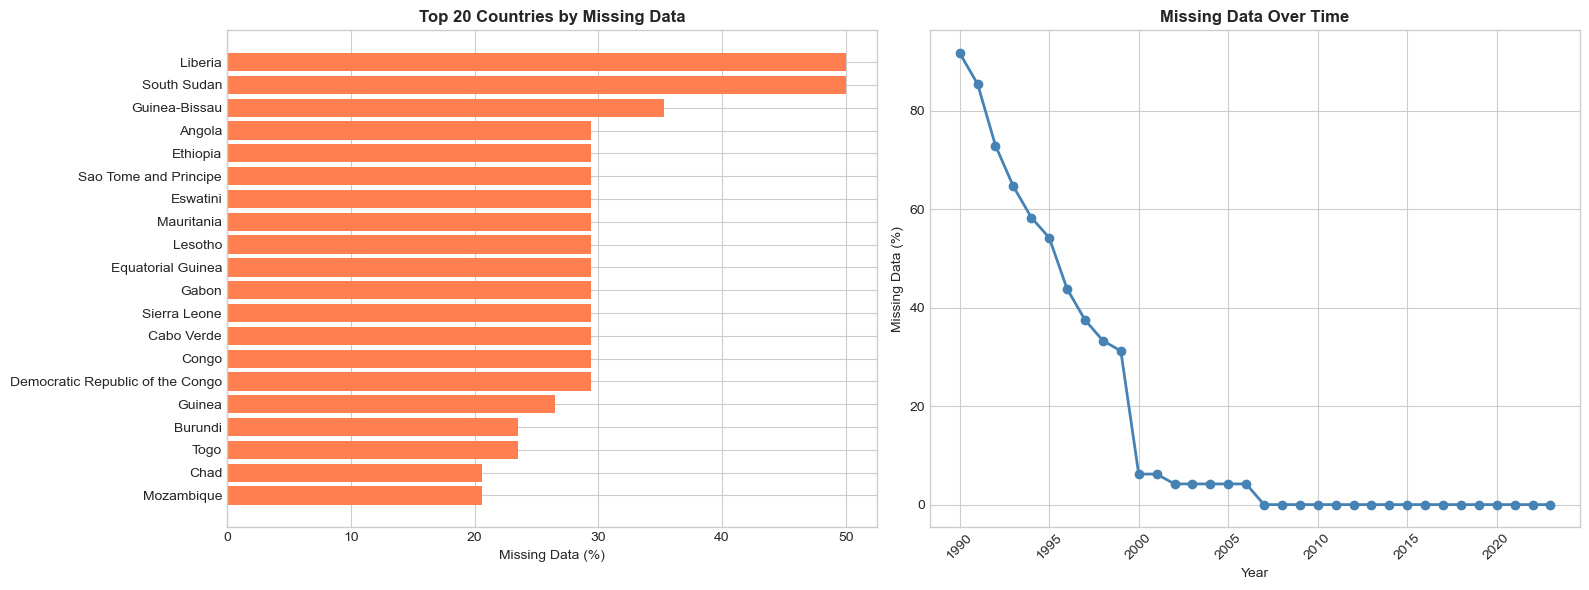


Figure saved: missing_data_analysis.png


In [19]:
# Visualize missing data pattern
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Missing by country (top 20)
ax1 = axes[0]
top_missing = missing_df.head(20)
ax1.barh(top_missing.index, top_missing['Missing %'], color='coral')
ax1.set_xlabel('Missing Data (%)')
ax1.set_title('Top 20 Countries by Missing Data', fontsize=12, fontweight='bold')
ax1.invert_yaxis()

# Missing by year
ax2 = axes[1]
ax2.plot(year_missing_df['Year'], year_missing_df['Missing %'], marker='o', linewidth=2, color='steelblue')
ax2.set_xlabel('Year')
ax2.set_ylabel('Missing Data (%)')
ax2.set_title('Missing Data Over Time', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
# Show every 5th year label
ax2.set_xticks(range(0, len(year_cols), 5))
ax2.set_xticklabels([year_cols[i] for i in range(0, len(year_cols), 5)])

plt.tight_layout()
plt.savefig('../csv/missing_data_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved: missing_data_analysis.png")

## 4.4 Data Transformation: Wide to Long Format

In [20]:
# Reshape from wide to long format
df_long = df_ssa_filtered.melt(
    id_vars=['Country Name', 'Country Code'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Electricity_Access_Pct'
)

# Convert Year to integer
df_long['Year'] = df_long['Year'].astype(int)

print(f"Long format shape: {df_long.shape}")
display(df_long.head(10))

Long format shape: (1632, 4)


,Country Name,Country Code,Year,Electricity_Access_Pct
0,Angola,AGO,1990,NaN
1,Burundi,BDI,1990,NaN
2,Benin,BEN,1990,NaN
3,Burkina Faso,BFA,1990,NaN
4,Botswana,BWA,1990,NaN
5,Central African Republic,CAF,1990,NaN
6,Côte d'Ivoire,CIV,1990,NaN
7,Cameroon,CMR,1990,NaN
8,Democratic Republic of the Congo,COD,1990,NaN
9,Congo,COG,1990,NaN


## 4.5 Merge with Country Metadata

In [21]:
# Prepare metadata for merging
df_meta_clean = df_meta_country[['Country Code', 'Region', 'IncomeGroup', 'TableName']].copy()
df_meta_clean = df_meta_clean.rename(columns={'TableName': 'Country_Full_Name'})

# Merge
df_final = df_long.merge(df_meta_clean, on='Country Code', how='left')

print(f"Final dataset shape: {df_final.shape}")
print(f"\nColumns: {df_final.columns.tolist()}")
display(df_final.head(10))

Final dataset shape: (1632, 7)

Columns: ['Country Name', 'Country Code', 'Year', 'Electricity_Access_Pct', 'Region', 'IncomeGroup', 'Country_Full_Name']


,Country Name,Country Code,Year,Electricity_Access_Pct,Region,IncomeGroup,Country_Full_Name
0,Angola,AGO,1990,NaN,Sub-Saharan Africa,Lower middle income,Angola
1,Burundi,BDI,1990,NaN,Sub-Saharan Africa,Low income,Burundi
2,Benin,BEN,1990,NaN,Sub-Saharan Africa,Lower middle income,Benin
3,Burkina Faso,BFA,1990,NaN,Sub-Saharan Africa,Low income,Burkina Faso
4,Botswana,BWA,1990,NaN,Sub-Saharan Africa,Upper middle income,Botswana
5,Central African Republic,CAF,1990,NaN,Sub-Saharan Africa,Low income,Central African Republic
6,Côte d'Ivoire,CIV,1990,NaN,Sub-Saharan Africa,Lower middle income,Côte d'Ivoire
7,Cameroon,CMR,1990,NaN,Sub-Saharan Africa,Lower middle income,Cameroon
8,Democratic Republic of the Congo,COD,1990,NaN,Sub-Saharan Africa,Low income,"Congo, Dem. Rep."
9,Congo,COG,1990,NaN,Sub-Saharan Africa,Lower middle income,"Congo, Rep."


In [22]:
# Check for any issues with the merge
print("--- Data Quality Check After Merge ---")
print(f"Missing Region: {df_final['Region'].isnull().sum()}")
print(f"Missing Income Group: {df_final['IncomeGroup'].isnull().sum()}")
print(f"\nUnique Regions: {df_final['Region'].dropna().unique()}")
print(f"\nUnique Income Groups: {df_final['IncomeGroup'].dropna().unique()}")

--- Data Quality Check After Merge ---
Missing Region: 0
Missing Income Group: 34

Unique Regions: ['Sub-Saharan Africa' 'Middle East & North Africa']

Unique Income Groups: ['Lower middle income' 'Low income' 'Upper middle income' 'High income']


## 4.6 Data Quality Checks

In [23]:
# Check for duplicate entries
duplicates = df_final.duplicated(subset=['Country Name', 'Year'], keep=False)
print(f"Duplicate country-year combinations: {duplicates.sum()}")

# Check value ranges
print(f"\n--- Value Range Check ---")
print(f"Min electricity access: {df_final['Electricity_Access_Pct'].min()}")
print(f"Max electricity access: {df_final['Electricity_Access_Pct'].max()}")

# Check for values outside 0-100
out_of_range = df_final[
    (df_final['Electricity_Access_Pct'] < 0) | 
    (df_final['Electricity_Access_Pct'] > 100)
]
print(f"\nValues outside 0-100 range: {len(out_of_range)}")

Duplicate country-year combinations: 0

--- Value Range Check ---
Min electricity access: 0.533898532390594
Max electricity access: 100.0

Values outside 0-100 range: 0


In [24]:
# Basic statistics of the clean dataset
print("=" * 60)
print("CLEAN DATASET SUMMARY STATISTICS")
print("=" * 60)
print(df_final['Electricity_Access_Pct'].describe())

CLEAN DATASET SUMMARY STATISTICS
count   1341.00
mean      38.49
std       26.56
min        0.53
25%       15.30
50%       34.50
75%       56.00
max      100.00
Name: Electricity_Access_Pct, dtype: float64


## 4.7 Export Clean Dataset

In [25]:
# Export clean dataset
output_path = '../csv/ssa_electricity_access_clean.csv'
df_final.to_csv(output_path, index=False)

print(f"Clean dataset exported to: {output_path}")
print(f"Final shape: {df_final.shape}")
print(f"\nColumns: {df_final.columns.tolist()}")

Clean dataset exported to: ../csv/ssa_electricity_access_clean.csv
Final shape: (1632, 7)

Columns: ['Country Name', 'Country Code', 'Year', 'Electricity_Access_Pct', 'Region', 'IncomeGroup', 'Country_Full_Name']


---
# 5. Exploratory Data Analysis <a id='5-eda'></a>

## 5.1 Summary Statistics

In [26]:
# Remove rows with missing electricity access for analysis
df_analysis = df_final.dropna(subset=['Electricity_Access_Pct']).copy()

print(f"Rows with data: {len(df_analysis)} out of {len(df_final)} ({len(df_analysis)/len(df_final)*100:.1f}%)")

Rows with data: 1341 out of 1632 (82.2%)


In [27]:
# Overall summary statistics
print("=" * 60)
print("OVERALL SUMMARY STATISTICS")
print("=" * 60)
print(df_analysis['Electricity_Access_Pct'].describe())

OVERALL SUMMARY STATISTICS
count   1341.00
mean      38.49
std       26.56
min        0.53
25%       15.30
50%       34.50
75%       56.00
max      100.00
Name: Electricity_Access_Pct, dtype: float64


In [28]:
# Statistics by decade
df_analysis['Decade'] = (df_analysis['Year'] // 10 * 10).astype(str) + 's'

decade_stats = df_analysis.groupby('Decade')['Electricity_Access_Pct'].agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
).round(2)
decade_stats.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']

print("\n--- Statistics by Decade ---")
display(decade_stats)


--- Statistics by Decade ---


,Count,Mean,Median,Std Dev,Min,Max
Decade,,,,,,
1990s,205,27.01,22.83,25.29,0.53,99.25
2000s,464,32.38,27.20,24.75,0.80,99.40
2010s,480,43.16,41.45,25.52,1.50,100.00
2020s,192,53.82,52.85,24.96,5.40,100.00


In [29]:
# Statistics by income group
income_stats = df_analysis.groupby('IncomeGroup')['Electricity_Access_Pct'].agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
).round(2)
income_stats.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']

print("\n--- Statistics by Income Group ---")
display(income_stats.sort_values('Mean', ascending=False))


--- Statistics by Income Group ---


,Count,Mean,Median,Std Dev,Min,Max
IncomeGroup,,,,,,
High income,30,96.79,96.90,3.03,90.00,100.00
Upper middle income,167,75.26,80.80,22.18,9.40,100.00
Lower middle income,573,42.95,42.50,18.46,1.30,89.90
Low income,547,19.76,14.80,15.43,0.53,66.90


In [30]:
# Current status (2023 or most recent year)
latest_year = df_analysis['Year'].max()
df_latest = df_analysis[df_analysis['Year'] == latest_year].copy()

print(f"\n--- Current Status ({latest_year}) ---")
print(f"Countries with data: {len(df_latest)}")
print(f"Average electricity access: {df_latest['Electricity_Access_Pct'].mean():.1f}%")
print(f"Median electricity access: {df_latest['Electricity_Access_Pct'].median():.1f}%")
print(f"\nCountries with >80% access: {(df_latest['Electricity_Access_Pct'] > 80).sum()}")
print(f"Countries with <20% access: {(df_latest['Electricity_Access_Pct'] < 20).sum()}")


--- Current Status (2023) ---
Countries with data: 48
Average electricity access: 56.4%
Median electricity access: 56.9%

Countries with >80% access: 9
Countries with <20% access: 5


## 5.2 Distribution Analysis

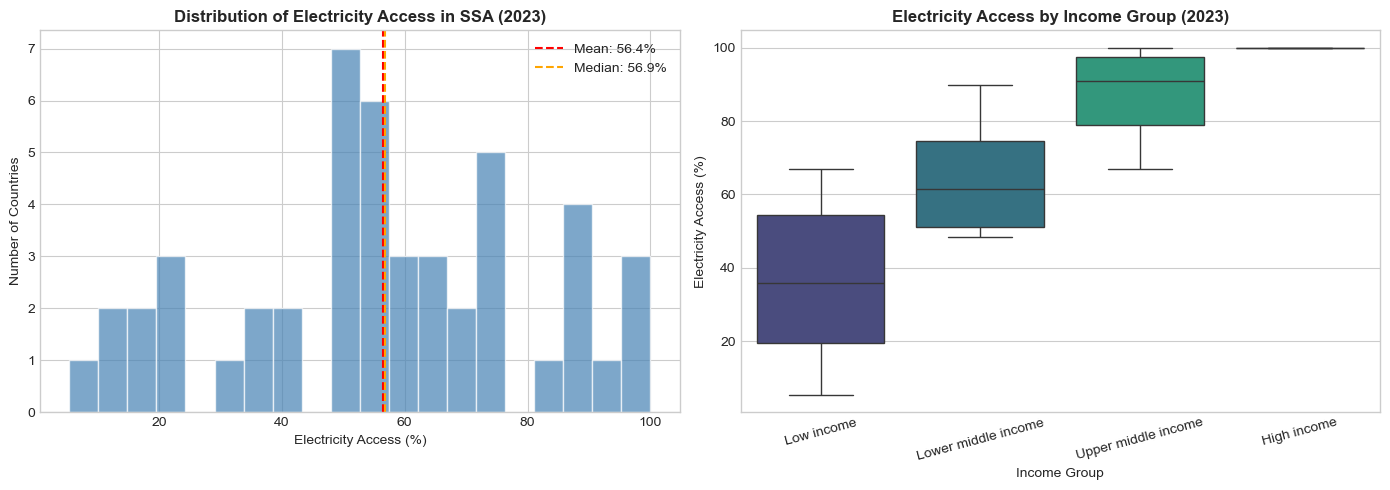

In [31]:
# Distribution of current electricity access
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1 = axes[0]
ax1.hist(df_latest['Electricity_Access_Pct'], bins=20, color='steelblue', edgecolor='white', alpha=0.7)
ax1.axvline(df_latest['Electricity_Access_Pct'].mean(), color='red', linestyle='--', label=f'Mean: {df_latest["Electricity_Access_Pct"].mean():.1f}%')
ax1.axvline(df_latest['Electricity_Access_Pct'].median(), color='orange', linestyle='--', label=f'Median: {df_latest["Electricity_Access_Pct"].median():.1f}%')
ax1.set_xlabel('Electricity Access (%)')
ax1.set_ylabel('Number of Countries')
ax1.set_title(f'Distribution of Electricity Access in SSA ({latest_year})', fontsize=12, fontweight='bold')
ax1.legend()

# Box plot by income group
ax2 = axes[1]
income_order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
df_latest_income = df_latest[df_latest['IncomeGroup'].isin(income_order)]
sns.boxplot(data=df_latest_income, x='IncomeGroup', y='Electricity_Access_Pct', order=income_order, palette='viridis', ax=ax2)
ax2.set_xlabel('Income Group')
ax2.set_ylabel('Electricity Access (%)')
ax2.set_title(f'Electricity Access by Income Group ({latest_year})', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('../csv/distribution_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## 5.3 Temporal Trends

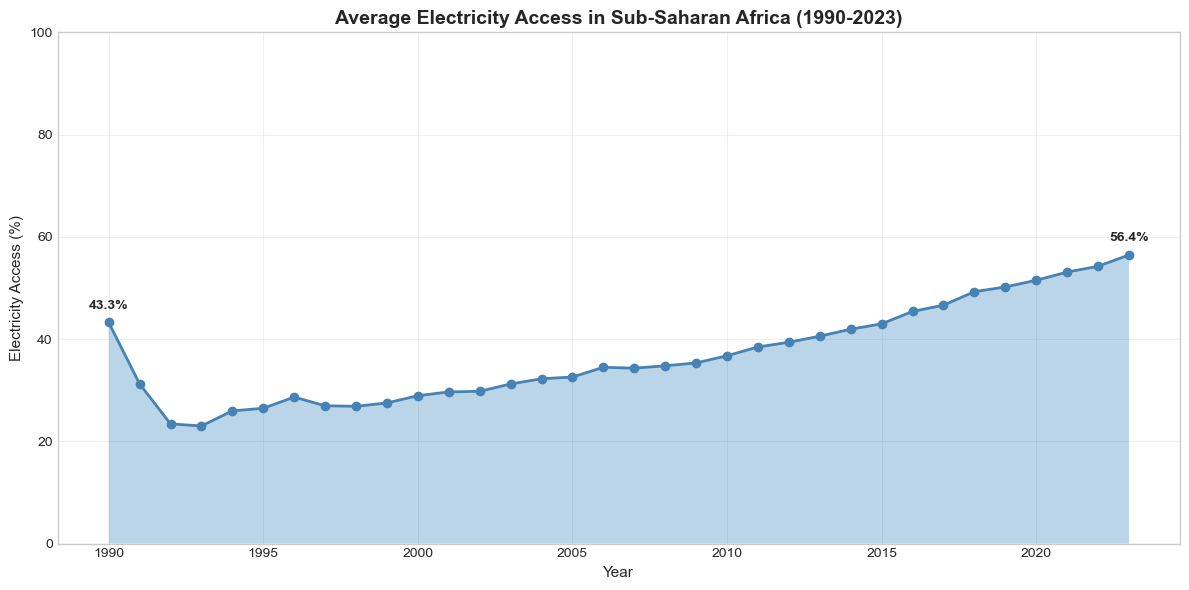


SSA average electricity access improved from 43.3% (1990) to 56.4% (2023)
Total improvement: +13.2 percentage points


In [32]:
# Calculate SSA average over time
ssa_avg_by_year = df_analysis.groupby('Year')['Electricity_Access_Pct'].mean().reset_index()
ssa_avg_by_year.columns = ['Year', 'Average_Access']

# Plot SSA average trend
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(ssa_avg_by_year['Year'], ssa_avg_by_year['Average_Access'], 
        marker='o', linewidth=2, markersize=6, color='steelblue')
ax.fill_between(ssa_avg_by_year['Year'], ssa_avg_by_year['Average_Access'], alpha=0.3)

ax.set_xlabel('Year', fontsize=11)
ax.set_ylabel('Electricity Access (%)', fontsize=11)
ax.set_title('Average Electricity Access in Sub-Saharan Africa (1990-2023)', fontsize=14, fontweight='bold')
ax.set_ylim(0, 100)
ax.grid(True, alpha=0.3)

# Add annotations for start and end
start_val = ssa_avg_by_year['Average_Access'].iloc[0]
end_val = ssa_avg_by_year['Average_Access'].iloc[-1]
ax.annotate(f'{start_val:.1f}%', (ssa_avg_by_year['Year'].iloc[0], start_val), 
            textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')
ax.annotate(f'{end_val:.1f}%', (ssa_avg_by_year['Year'].iloc[-1], end_val), 
            textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../csv/ssa_average_trend.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nSSA average electricity access improved from {start_val:.1f}% ({ssa_avg_by_year['Year'].iloc[0]}) to {end_val:.1f}% ({ssa_avg_by_year['Year'].iloc[-1]})")
print(f"Total improvement: +{end_val - start_val:.1f} percentage points")

In [33]:
# Calculate improvement for each country
# Get first and last available year for each country
country_improvement = []

for country in df_analysis['Country Name'].unique():
    country_data = df_analysis[df_analysis['Country Name'] == country].sort_values('Year')
    if len(country_data) >= 2:
        first_year = country_data['Year'].iloc[0]
        last_year = country_data['Year'].iloc[-1]
        first_val = country_data['Electricity_Access_Pct'].iloc[0]
        last_val = country_data['Electricity_Access_Pct'].iloc[-1]
        
        country_improvement.append({
            'Country': country,
            'First_Year': first_year,
            'Last_Year': last_year,
            'First_Value': first_val,
            'Last_Value': last_val,
            'Absolute_Change': last_val - first_val,
            'Years_Span': last_year - first_year
        })

df_improvement = pd.DataFrame(country_improvement)
df_improvement['Annual_Change'] = df_improvement['Absolute_Change'] / df_improvement['Years_Span']
df_improvement = df_improvement.sort_values('Absolute_Change', ascending=False)

print("--- Top 10 Most Improved Countries ---")
display(df_improvement.head(10)[['Country', 'First_Value', 'Last_Value', 'Absolute_Change', 'Annual_Change']].round(2))

print("\n--- Bottom 10 (Least Improved/Declined) ---")
display(df_improvement.tail(10)[['Country', 'First_Value', 'Last_Value', 'Absolute_Change', 'Annual_Change']].round(2))

--- Top 10 Most Improved Countries ---


,Country,First_Value,Last_Value,Absolute_Change,Annual_Change
44,Eswatini,20.40,86.40,66.00,2.87
4,Botswana,10.10,76.00,65.90,2.06
17,Kenya,10.90,76.20,65.30,2.18
11,Rwanda,2.30,63.90,61.60,1.99
24,Comoros,28.90,89.80,60.90,2.26
15,Ghana,30.60,89.50,58.90,1.96
40,Lesotho,4.30,57.30,53.00,2.30
16,Gambia,17.70,66.90,49.20,1.64
26,Mali,6.20,54.50,48.30,1.79
18,Senegal,26.00,74.20,48.20,1.61



--- Bottom 10 (Least Improved/Declined) ---


,Country,First_Value,Last_Value,Absolute_Change,Annual_Change
34,Democratic Republic of the Congo,6.70,22.10,15.40,0.67
21,Central African Republic,3.00,17.60,14.60,0.52
8,Malawi,3.20,15.60,12.40,0.40
20,Seychelles,90.00,100.00,10.00,0.34
29,Chad,2.30,12.00,9.70,0.37
30,Burundi,3.90,11.60,7.70,0.31
47,South Sudan,0.80,5.40,4.60,0.29
25,Djibouti,62.00,65.20,3.20,0.12
39,Equatorial Guinea,64.80,66.90,2.10,0.09
0,Mauritius,99.04,100.00,0.96,0.03


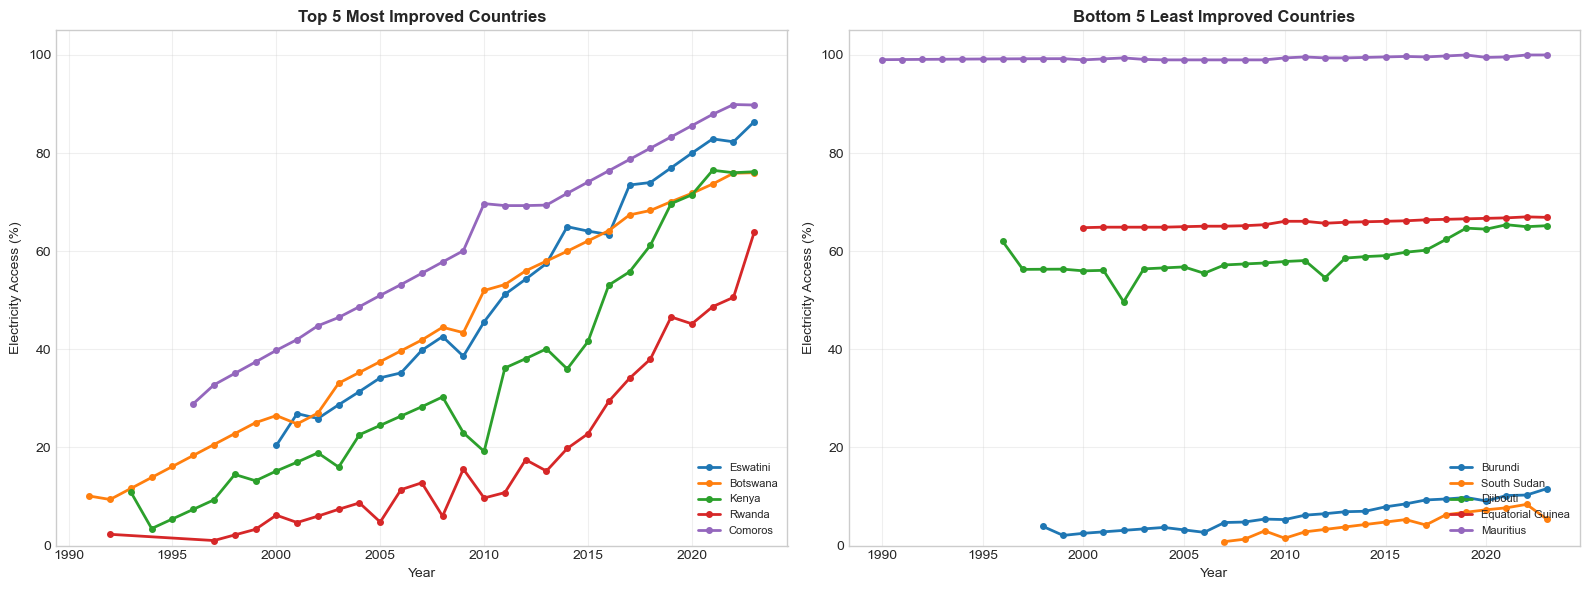

In [34]:
# Top 5 vs Bottom 5 countries trend comparison
top5_countries = df_improvement.head(5)['Country'].tolist()
bottom5_countries = df_improvement.tail(5)['Country'].tolist()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 5
ax1 = axes[0]
for country in top5_countries:
    country_data = df_analysis[df_analysis['Country Name'] == country]
    ax1.plot(country_data['Year'], country_data['Electricity_Access_Pct'], 
             marker='o', linewidth=2, markersize=4, label=country)
ax1.set_xlabel('Year')
ax1.set_ylabel('Electricity Access (%)')
ax1.set_title('Top 5 Most Improved Countries', fontsize=12, fontweight='bold')
ax1.legend(loc='lower right', fontsize=8)
ax1.set_ylim(0, 105)
ax1.grid(True, alpha=0.3)

# Bottom 5
ax2 = axes[1]
for country in bottom5_countries:
    country_data = df_analysis[df_analysis['Country Name'] == country]
    ax2.plot(country_data['Year'], country_data['Electricity_Access_Pct'], 
             marker='o', linewidth=2, markersize=4, label=country)
ax2.set_xlabel('Year')
ax2.set_ylabel('Electricity Access (%)')
ax2.set_title('Bottom 5 Least Improved Countries', fontsize=12, fontweight='bold')
ax2.legend(loc='lower right', fontsize=8)
ax2.set_ylim(0, 105)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../csv/top_bottom_countries.png', dpi=150, bbox_inches='tight')
plt.show()

## 5.4 Geographic/Comparative Analysis

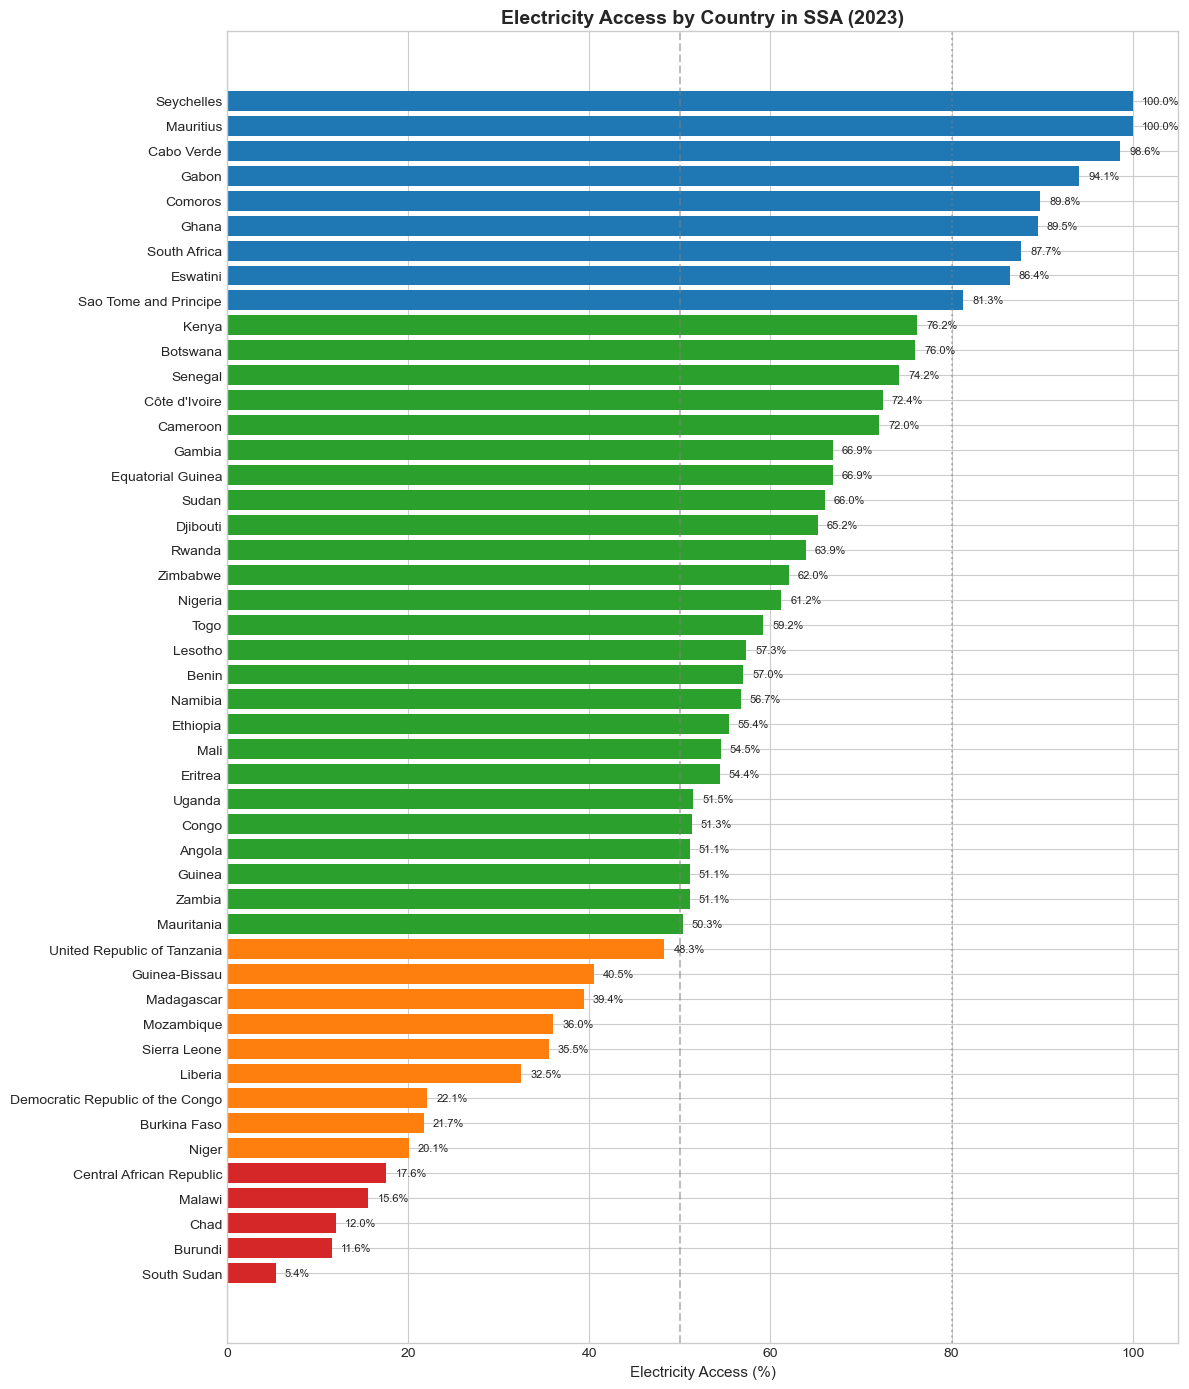

In [35]:
# Current electricity access by country (sorted)
df_current_sorted = df_latest.sort_values('Electricity_Access_Pct', ascending=True)

fig, ax = plt.subplots(figsize=(12, 14))

colors = ['#d62728' if x < 20 else '#ff7f0e' if x < 50 else '#2ca02c' if x < 80 else '#1f77b4' 
          for x in df_current_sorted['Electricity_Access_Pct']]

ax.barh(df_current_sorted['Country Name'], df_current_sorted['Electricity_Access_Pct'], color=colors)
ax.set_xlabel('Electricity Access (%)', fontsize=11)
ax.set_title(f'Electricity Access by Country in SSA ({latest_year})', fontsize=14, fontweight='bold')
ax.axvline(50, color='gray', linestyle='--', alpha=0.5, label='50% threshold')
ax.axvline(80, color='gray', linestyle=':', alpha=0.5, label='80% threshold')

# Add value labels
for i, (idx, row) in enumerate(df_current_sorted.iterrows()):
    ax.text(row['Electricity_Access_Pct'] + 1, i, f"{row['Electricity_Access_Pct']:.1f}%", 
            va='center', fontsize=8)

plt.tight_layout()
plt.savefig('../csv/country_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

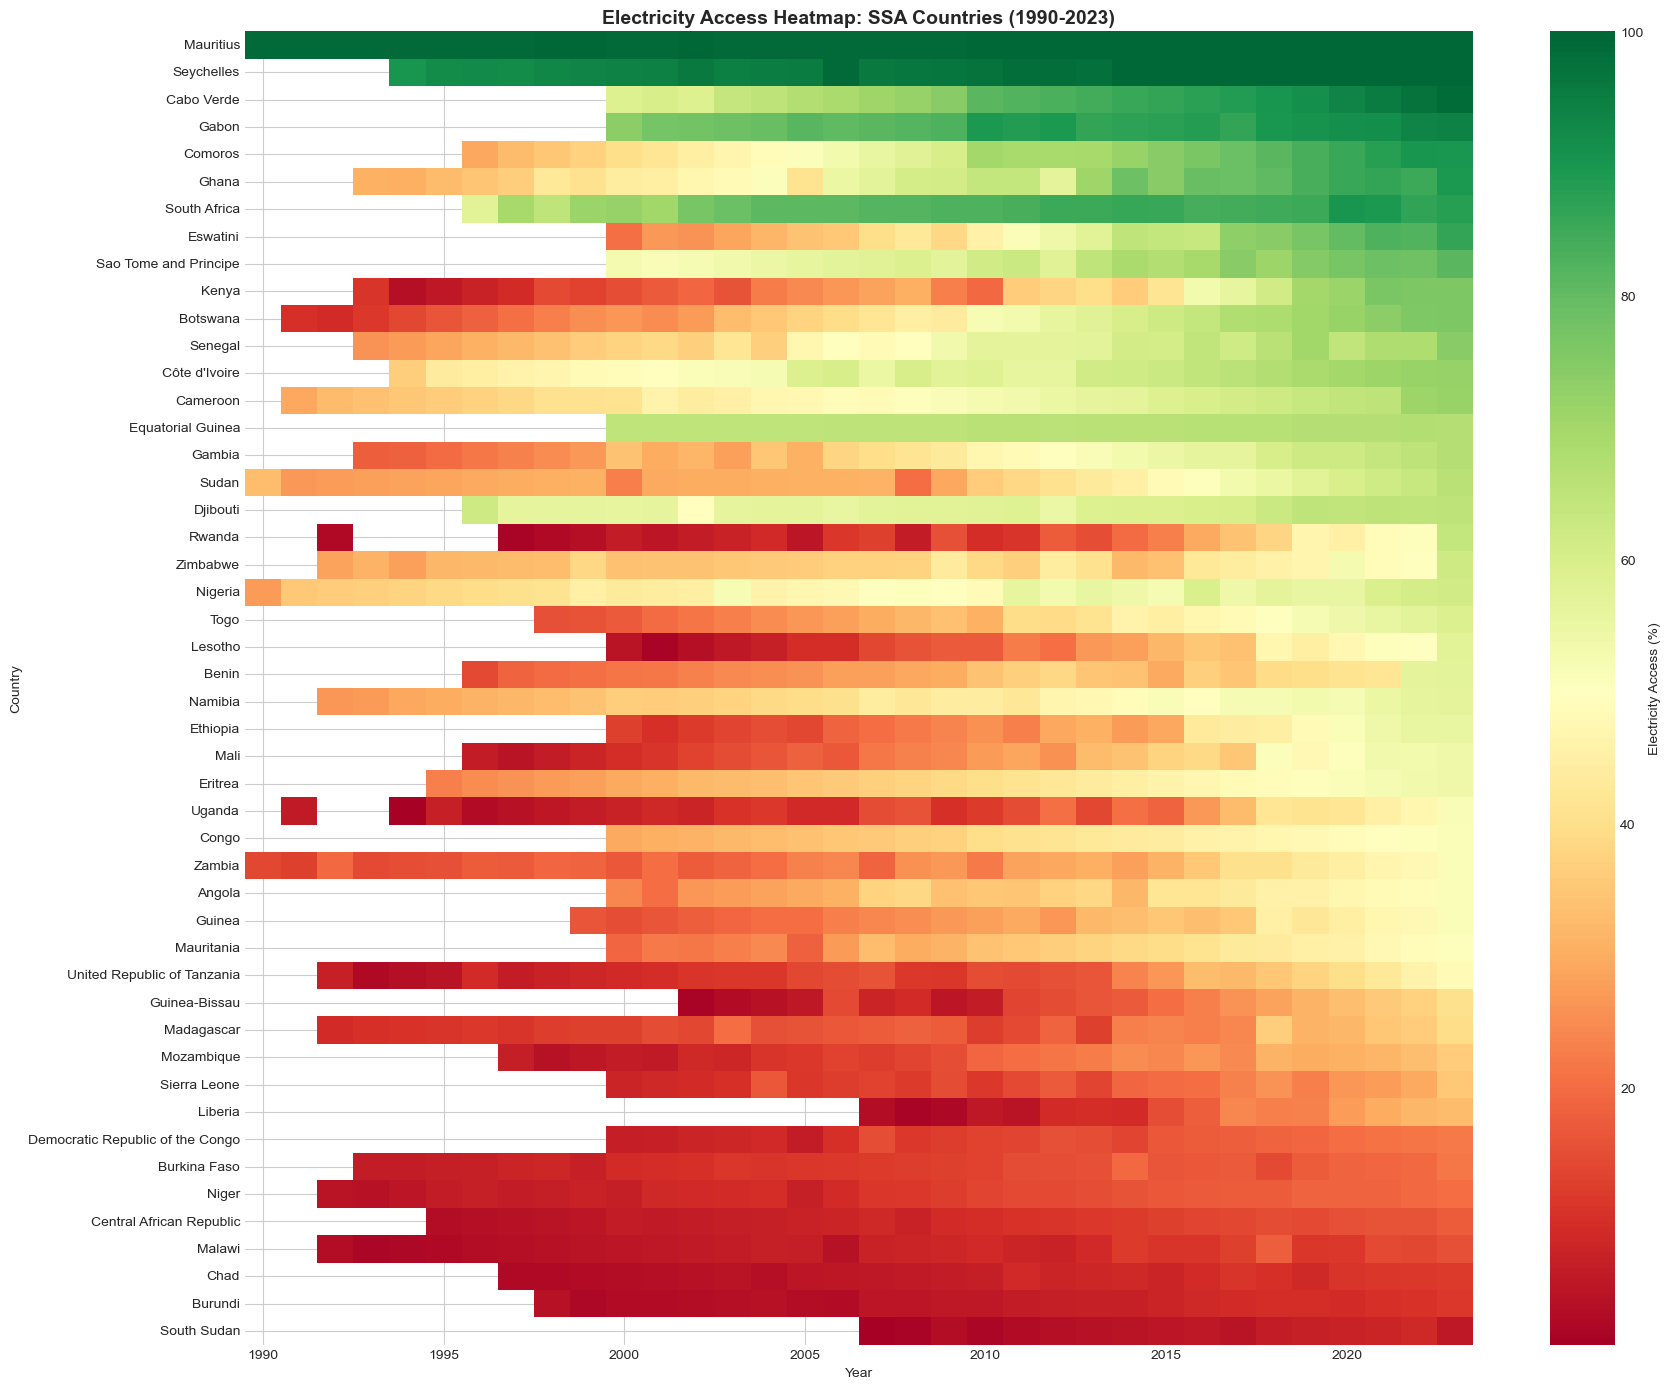

In [36]:
# Heatmap: Countries x Years
# Pivot the data
pivot_data = df_analysis.pivot_table(
    index='Country Name', 
    columns='Year', 
    values='Electricity_Access_Pct'
)

# Sort by latest year value
if latest_year in pivot_data.columns:
    pivot_data = pivot_data.sort_values(latest_year, ascending=False)

fig, ax = plt.subplots(figsize=(18, 14))

sns.heatmap(pivot_data, cmap='RdYlGn', center=50, 
            cbar_kws={'label': 'Electricity Access (%)'}, ax=ax,
            xticklabels=5)  # Show every 5th year

ax.set_title('Electricity Access Heatmap: SSA Countries (1990-2023)', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Country')

plt.tight_layout()
plt.savefig('../csv/heatmap_countries_years.png', dpi=150, bbox_inches='tight')
plt.show()

## 5.5 Anomaly Detection

In [37]:
# Detect sudden changes (year-over-year change > 15 percentage points)
df_analysis_sorted = df_analysis.sort_values(['Country Name', 'Year'])
df_analysis_sorted['Prev_Value'] = df_analysis_sorted.groupby('Country Name')['Electricity_Access_Pct'].shift(1)
df_analysis_sorted['YoY_Change'] = df_analysis_sorted['Electricity_Access_Pct'] - df_analysis_sorted['Prev_Value']

# Find anomalies
threshold = 15
anomalies = df_analysis_sorted[
    (df_analysis_sorted['YoY_Change'].abs() > threshold) & 
    (df_analysis_sorted['YoY_Change'].notna())
].copy()

print(f"=" * 60)
print(f"ANOMALY DETECTION: Year-over-Year Changes > {threshold} percentage points")
print(f"=" * 60)
print(f"\nTotal anomalies found: {len(anomalies)}")

if len(anomalies) > 0:
    display(anomalies[['Country Name', 'Year', 'Prev_Value', 'Electricity_Access_Pct', 'YoY_Change']].sort_values('YoY_Change', ascending=False).head(20))

ANOMALY DETECTION: Year-over-Year Changes > 15 percentage points

Total anomalies found: 2


,Country Name,Year,Prev_Value,Electricity_Access_Pct,YoY_Change
1029,Kenya,2011,19.20,36.20,17.00
1369,Mali,2018,34.80,50.90,16.10


In [38]:
# Statistical outliers using IQR method
Q1 = df_analysis['Electricity_Access_Pct'].quantile(0.25)
Q3 = df_analysis['Electricity_Access_Pct'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\n--- IQR Outlier Detection ---")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

outliers = df_analysis[
    (df_analysis['Electricity_Access_Pct'] < lower_bound) | 
    (df_analysis['Electricity_Access_Pct'] > upper_bound)
]
print(f"\nOutliers found: {len(outliers)}")

# Note: Since electricity access can legitimately range from 0-100%, 
# there may not be statistical outliers in the traditional sense


--- IQR Outlier Detection ---
Q1: 15.30, Q3: 56.00, IQR: 40.70
Lower bound: -45.75
Upper bound: 117.05

Outliers found: 0


## 5.6 Additional Visualizations

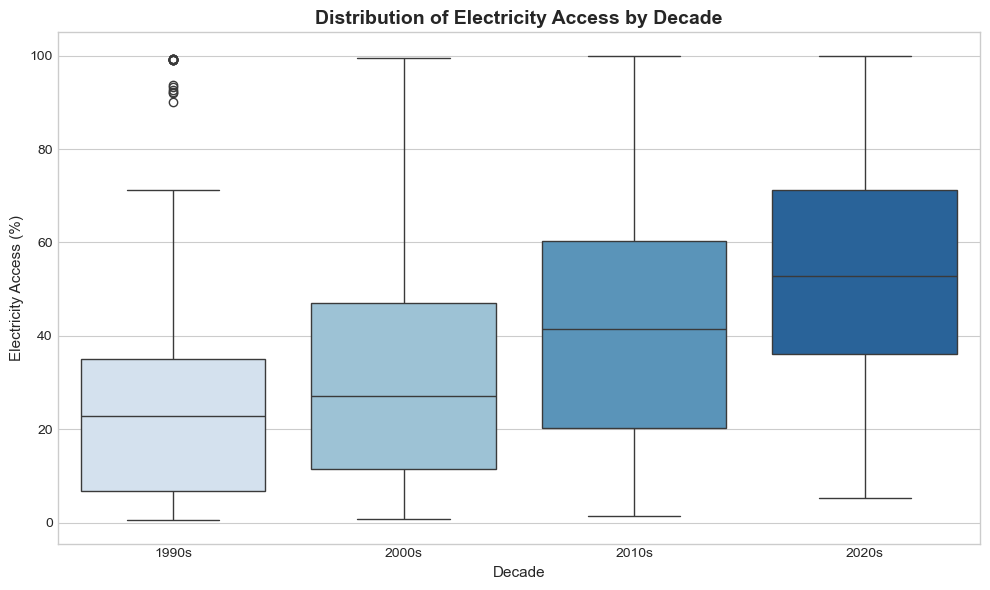

In [39]:
# Box plot by decade
fig, ax = plt.subplots(figsize=(10, 6))

decade_order = ['1990s', '2000s', '2010s', '2020s']
df_decade = df_analysis[df_analysis['Decade'].isin(decade_order)]

sns.boxplot(data=df_decade, x='Decade', y='Electricity_Access_Pct', 
            order=decade_order, palette='Blues', ax=ax)

ax.set_xlabel('Decade', fontsize=11)
ax.set_ylabel('Electricity Access (%)', fontsize=11)
ax.set_title('Distribution of Electricity Access by Decade', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../csv/boxplot_decades.png', dpi=150, bbox_inches='tight')
plt.show()

Countries with data in both 1990 and 2023: 4


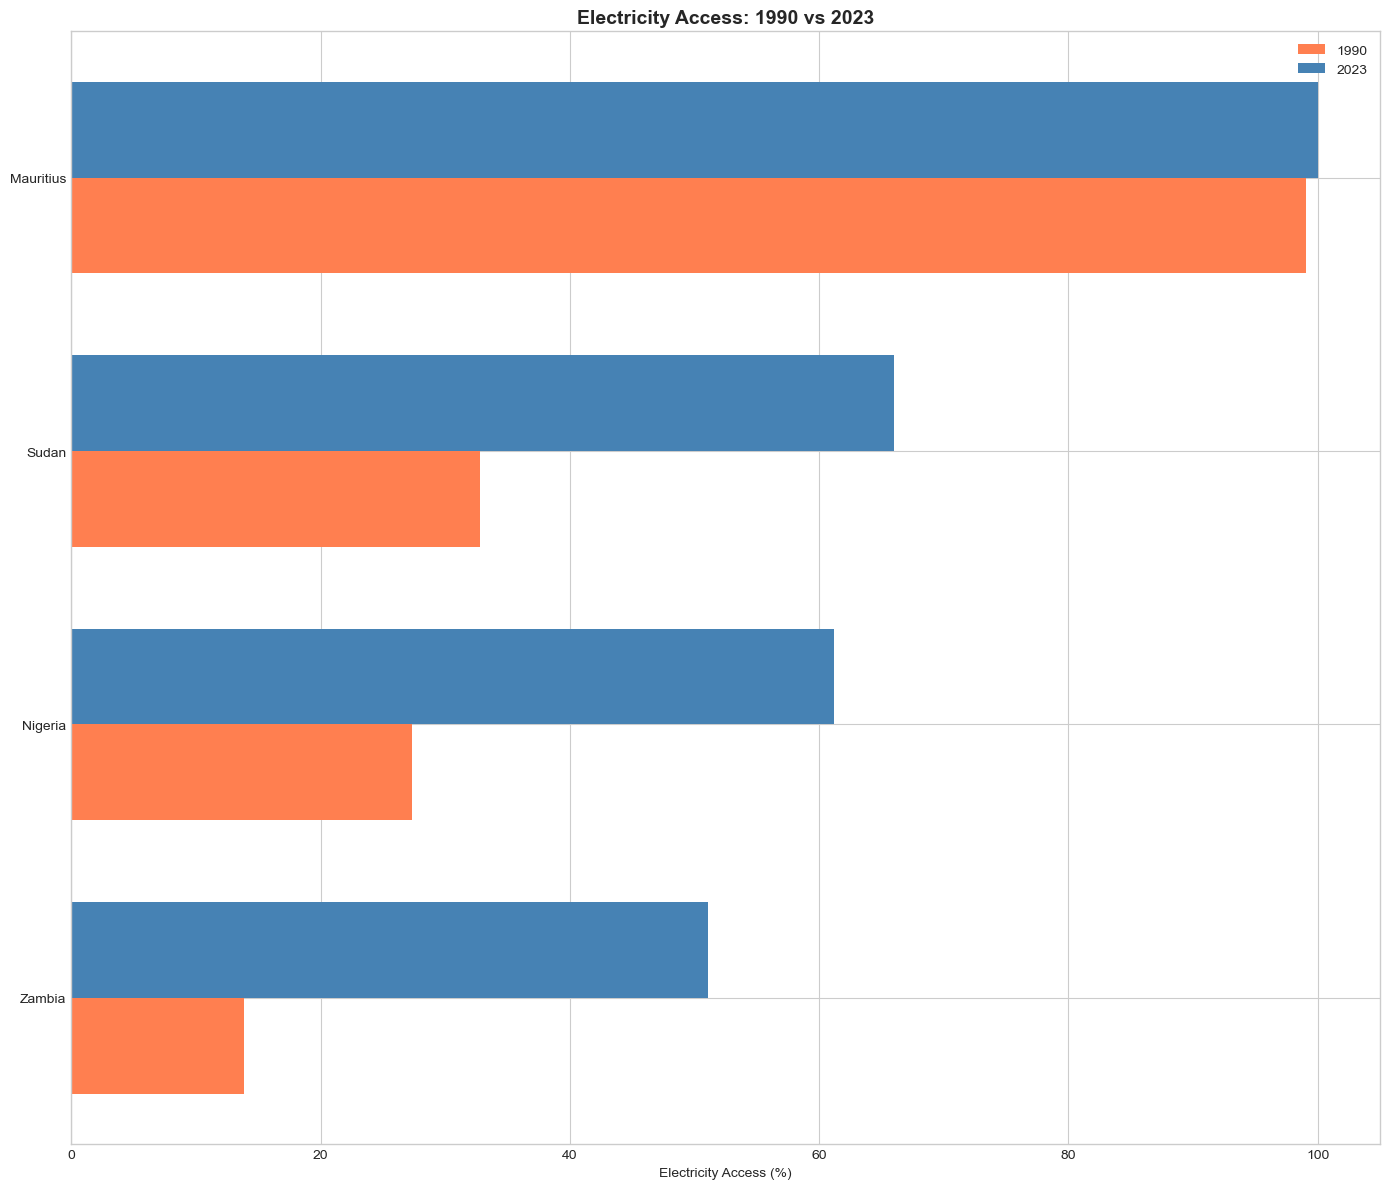

In [40]:
# Before vs After comparison (1990 vs 2023)
# Get countries with data in both 1990 and latest year
df_1990 = df_analysis[df_analysis['Year'] == 1990][['Country Name', 'Electricity_Access_Pct']].rename(
    columns={'Electricity_Access_Pct': 'Access_1990'})
df_2023 = df_analysis[df_analysis['Year'] == latest_year][['Country Name', 'Electricity_Access_Pct']].rename(
    columns={'Electricity_Access_Pct': f'Access_{latest_year}'})

df_comparison = df_1990.merge(df_2023, on='Country Name', how='inner')
df_comparison = df_comparison.sort_values(f'Access_{latest_year}', ascending=True)

print(f"Countries with data in both 1990 and {latest_year}: {len(df_comparison)}")

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 12))

y_pos = np.arange(len(df_comparison))
height = 0.35

bars1 = ax.barh(y_pos - height/2, df_comparison['Access_1990'], height, label='1990', color='coral')
bars2 = ax.barh(y_pos + height/2, df_comparison[f'Access_{latest_year}'], height, label=str(latest_year), color='steelblue')

ax.set_yticks(y_pos)
ax.set_yticklabels(df_comparison['Country Name'])
ax.set_xlabel('Electricity Access (%)')
ax.set_title(f'Electricity Access: 1990 vs {latest_year}', fontsize=14, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.savefig('../csv/before_after_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

---
# 6. Key Findings & Insights <a id='6-findings'></a>

In [41]:
# Compile key findings
print("=" * 70)
print("KEY FINDINGS SUMMARY")
print("=" * 70)

# Overall trend
start_avg = ssa_avg_by_year['Average_Access'].iloc[0]
end_avg = ssa_avg_by_year['Average_Access'].iloc[-1]
total_improvement = end_avg - start_avg

print(f"\n1. OVERALL TREND")
print(f"   - SSA average electricity access: {start_avg:.1f}% (1990) -> {end_avg:.1f}% ({latest_year})")
print(f"   - Total improvement: +{total_improvement:.1f} percentage points over {latest_year - 1990} years")
print(f"   - Average annual improvement: +{total_improvement/(latest_year-1990):.2f} percentage points/year")

# Current status
print(f"\n2. CURRENT STATUS ({latest_year})")
print(f"   - Countries with >80% access: {(df_latest['Electricity_Access_Pct'] > 80).sum()}")
print(f"   - Countries with 50-80% access: {((df_latest['Electricity_Access_Pct'] >= 50) & (df_latest['Electricity_Access_Pct'] <= 80)).sum()}")
print(f"   - Countries with <50% access: {(df_latest['Electricity_Access_Pct'] < 50).sum()}")
print(f"   - Countries with <20% access: {(df_latest['Electricity_Access_Pct'] < 20).sum()}")

# Top performers
print(f"\n3. TOP PERFORMERS (Highest access in {latest_year})")
top5_current = df_latest.nlargest(5, 'Electricity_Access_Pct')
for _, row in top5_current.iterrows():
    print(f"   - {row['Country Name']}: {row['Electricity_Access_Pct']:.1f}%")

# Most improved
print(f"\n4. MOST IMPROVED COUNTRIES")
for _, row in df_improvement.head(5).iterrows():
    print(f"   - {row['Country']}: +{row['Absolute_Change']:.1f}pp ({row['First_Value']:.1f}% -> {row['Last_Value']:.1f}%)")

# Challenges
print(f"\n5. COUNTRIES FACING CHALLENGES (Lowest access in {latest_year})")
bottom5_current = df_latest.nsmallest(5, 'Electricity_Access_Pct')
for _, row in bottom5_current.iterrows():
    print(f"   - {row['Country Name']}: {row['Electricity_Access_Pct']:.1f}%")

# Data quality
print(f"\n6. DATA QUALITY NOTES")
print(f"   - Countries with complete data (all years): {(missing_df['Missing %'] == 0).sum()}")
print(f"   - Countries with >50% missing data: {(missing_df['Missing %'] > 50).sum()}")
print(f"   - Anomalies detected (>15pp YoY change): {len(anomalies)}")

KEY FINDINGS SUMMARY

1. OVERALL TREND
   - SSA average electricity access: 43.3% (1990) -> 56.4% (2023)
   - Total improvement: +13.2 percentage points over 33 years
   - Average annual improvement: +0.40 percentage points/year

2. CURRENT STATUS (2023)
   - Countries with >80% access: 9
   - Countries with 50-80% access: 25
   - Countries with <50% access: 14
   - Countries with <20% access: 5

3. TOP PERFORMERS (Highest access in 2023)
   - Mauritius: 100.0%
   - Seychelles: 100.0%
   - Cabo Verde: 98.6%
   - Gabon: 94.1%
   - Comoros: 89.8%

4. MOST IMPROVED COUNTRIES
   - Eswatini: +66.0pp (20.4% -> 86.4%)
   - Botswana: +65.9pp (10.1% -> 76.0%)
   - Kenya: +65.3pp (10.9% -> 76.2%)
   - Rwanda: +61.6pp (2.3% -> 63.9%)
   - Comoros: +60.9pp (28.9% -> 89.8%)

5. COUNTRIES FACING CHALLENGES (Lowest access in 2023)
   - South Sudan: 5.4%
   - Burundi: 11.6%
   - Chad: 12.0%
   - Malawi: 15.6%
   - Central African Republic: 17.6%

6. DATA QUALITY NOTES
   - Countries with complete data

---
# 7. Hypotheses for ML Phase <a id='7-hypotheses'></a>

Based on the EDA findings, we formulate the following hypotheses for the machine learning phase:

## 7.1 Testable Hypotheses

### H1: Economic Development Correlation
> Countries with higher GDP per capita growth rates show faster improvements in electricity access.

**Rationale:** The strong correlation between income group and electricity access suggests economic factors drive electrification.

### H2: Education Outcomes
> Electricity access improvements correlate with improved educational outcomes (school enrollment, literacy rates).

**Rationale:** Electricity enables study time (lighting), digital learning, and school infrastructure.

### H3: Health Indicators
> Countries with higher electricity access show better health outcomes (life expectancy, infant mortality).

**Rationale:** Healthcare facilities require electricity for equipment, refrigeration, and lighting.

### H4: Urban-Rural Divide
> The gap between urban and rural electricity access is decreasing over time in SSA.

**Rationale:** Off-grid solutions and rural electrification programs may be closing the gap.

### H5: Regional Clustering
> Countries in the same geographic sub-region show similar electricity access trajectories.

**Rationale:** Regional infrastructure projects, cross-border power sharing, and similar development patterns.

## 7.2 Recommended Additional Datasets

For the ML phase, the following World Bank indicators should be collected:

| Category | Indicator Code | Indicator Name |
|----------|----------------|----------------|
| **Education** | SE.PRM.ENRR | School enrollment, primary (% gross) |
| **Education** | SE.ADT.LITR.ZS | Literacy rate, adult total |
| **Health** | SP.DYN.LE00.IN | Life expectancy at birth |
| **Health** | SP.DYN.IMRT.IN | Infant mortality rate |
| **Water** | SH.H2O.BASW.ZS | Access to basic drinking water (% population) |
| **Air Quality** | EN.ATM.PM25.MC.M3 | PM2.5 air pollution, mean annual exposure |
| **Economic** | NY.GDP.PCAP.CD | GDP per capita |
| **Urban** | SP.URB.TOTL.IN.ZS | Urban population (% of total) |

## 7.3 Potential ML Model Approaches

1. **Regression Models:** Predict electricity access improvement rates based on economic, education, and health indicators
2. **Clustering:** Group countries by development trajectory patterns
3. **Time Series Forecasting:** Project future electricity access levels
4. **Causal Inference:** Estimate the impact of electricity access on other SDG indicators

---
# 8. Conclusion <a id='8-conclusion'></a>

## 8.1 Summary

This exploratory data analysis examined electricity access trends across 50 Sub-Saharan African countries from 1990 to 2023. Key findings include:

1. **Significant Progress:** SSA has made substantial progress in electricity access, with average access improving significantly over the study period.

2. **Persistent Disparities:** Despite overall improvement, large disparities remain between countries and income groups. Several countries still have access rates below 20%.

3. **Success Stories:** Countries like Kenya, Rwanda, and Ethiopia have shown remarkable improvements, demonstrating that rapid electrification is achievable.

4. **Data Quality:** The World Bank dataset is comprehensive but has gaps for some countries and years, particularly for newer nations and conflict-affected areas.

## 8.2 Limitations

- **Definition of Access:** The binary "access/no access" measure doesn't capture quality, reliability, or hours of availability
- **Survey Timing:** Different survey years across countries may affect comparability
- **Missing Data:** Some countries have significant data gaps, particularly Somalia, South Sudan, and Mayotte
- **Aggregation:** National averages mask sub-national and urban/rural disparities

## 8.3 Next Steps

1. **Download additional SDG indicators** for correlation analysis (education, health, water, air quality)
2. **Merge datasets** and handle missing values across multiple indicators
3. **Build ML models** to test hypotheses and predict impacts
4. **Create interactive dashboard** for final deliverable
5. **Develop policy recommendations** based on findings

---

*Report generated: November 2025*